# Import lib

In [12]:
import tensorflow as tf
import numpy as np

# Membuat data generator

In [13]:
img_path = './Fresh Water Fish Dataset/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2
)

# bacth untuk gambar

In [14]:
train_generator = train_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 109 images belonging to 7 classes.
Found 24 images belonging to 7 classes.


# membuat model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(160,160,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

# bentuk model

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 158, 158, 256)     7168      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 79, 79, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 77, 77, 128)       295040    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 38, 38, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 36, 36, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 18, 18, 64)       

# Compile

In [28]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

# Training

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1000,
    verbose=1,
    callbacks=[earlystop]
)

Epoch 1/1000
7/7 [==============================] - 8s 1s/step - loss: 1.9362 - accuracy: 0.1743 - val_loss: 1.8365 - val_accuracy: 0.1250
Epoch 2/1000
7/7 [==============================] - 7s 1s/step - loss: 1.7373 - accuracy: 0.2569 - val_loss: 1.8167 - val_accuracy: 0.0833
Epoch 3/1000
7/7 [==============================] - 7s 1s/step - loss: 1.6354 - accuracy: 0.3945 - val_loss: 1.7849 - val_accuracy: 0.1667
Epoch 4/1000
7/7 [==============================] - 7s 1s/step - loss: 1.5670 - accuracy: 0.4220 - val_loss: 1.8071 - val_accuracy: 0.2500
Epoch 5/1000
7/7 [==============================] - 7s 1s/step - loss: 1.5353 - accuracy: 0.4495 - val_loss: 1.9041 - val_accuracy: 0.2083
Epoch 6/1000
7/7 [==============================] - 8s 1s/step - loss: 1.4692 - accuracy: 0.4587 - val_loss: 2.1243 - val_accuracy: 0.2500
Epoch 7/1000
7/7 [==============================] - 7s 1s/step - loss: 1.3835 - accuracy: 0.5138 - val_loss: 1.8627 - val_accuracy: 0.2083
Epoch 8/1000
7/7 [=========

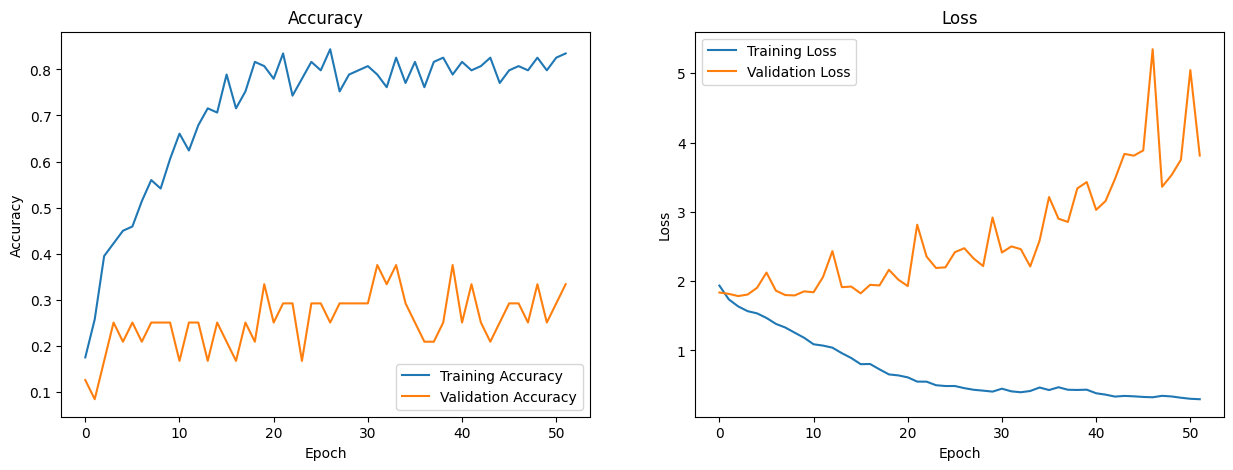

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()